# Linear Regression
## Question 1
Make a class called LinearRegression which provides two functions : fit and predict. Try to implement it from scratch. If stuck, refer to the examples folder.

In [1]:
import numpy as np

In [4]:
class LinearRegression:
  def fit(self, X, y):
        X = np.c_[np.ones(X.shape[0]), X]

        self.theta = np.linalg.inv(X.T @ X) @ X.T @ y

  def predict(self, X):
        X = np.c_[np.ones(X.shape[0]), X]
        return X @ self.theta

In [5]:
X = np.array([[1], [2], [3], [4]])
y = np.array([2, 4, 6, 8])

model = LinearRegression()
model.fit(X, y)

predictions = model.predict(X)
print(predictions)

[2. 4. 6. 8.]


## Question 2

Use the dataset https://www.kaggle.com/datasets/quantbruce/real-estate-price-prediction (*).
1. Read it using pandas.
2. Check for **null values**.
3. For each of the columns (except the first and last), plot the column values in the X-axis against the last column of prices in the Y-axis.
4. Remove the unwanted columns.
5. Split the dataset into train and test data. Test data size = 25% of total dataset.
6. **Normalize** the X_train and X_test using MinMaxScaler from sklearn.preprocessing.
7. Fit the training data into the model created in question 1 and predict the testing data.
8. Use **mean square error and R<sup>2</sup>** from sklearn.metrics as evaluation criterias.
9. Fit the training data into the models of the same name provided by sklearn.linear_model and evaluate the predictions using MSE and R<sup>2</sup>.
10. Tune the hyperparameters of your models (learning rate, epochs) to achieve losses close to that of the sklearn models.

Note : (*) To solve this question, you may proceed in any of the following ways :
1. Prepare the notebook in Kaggle, download it and submit it separately with the other questions.
2. Download the dataset from kaggle. Upload it to the session storage in Colab.
3. Use Colab data directly in Colab. [Refer here](https://www.kaggle.com/general/74235). For this, you need to create kaggle API token. Before submitting, hide or remove the API token.

In [6]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.linear_model import LinearRegression as SklearnLR

In [7]:
df = pd.read_csv("Real estate.csv")
df.head()

,No,X1 transaction date,X2 house age,X3 distance to the nearest MRT station,X4 number of convenience stores,X5 latitude,X6 longitude,Y house price of unit area
0,1,2012.917,32.0,84.87882,10,24.98298,121.54024,37.9
1,2,2012.917,19.5,306.59470,9,24.98034,121.53951,42.2
2,3,2013.583,13.3,561.98450,5,24.98746,121.54391,47.3
3,4,2013.500,13.3,561.98450,5,24.98746,121.54391,54.8
4,5,2012.833,5.0,390.56840,5,24.97937,121.54245,43.1


In [8]:
df.isnull().sum()

,0
No,0
X1 transaction date,0
X2 house age,0
X3 distance to the nearest MRT station,0
X4 number of convenience stores,0
X5 latitude,0
X6 longitude,0
Y house price of unit area,0


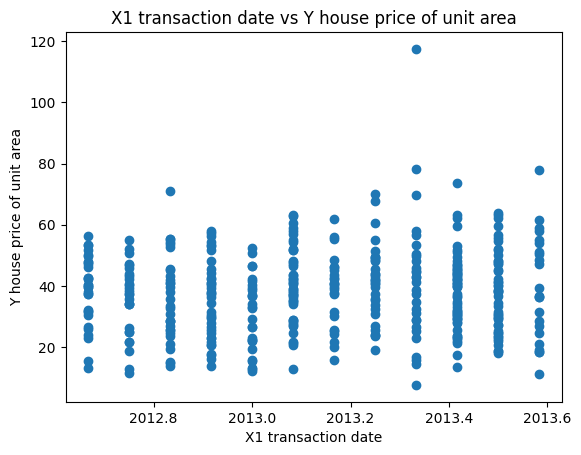

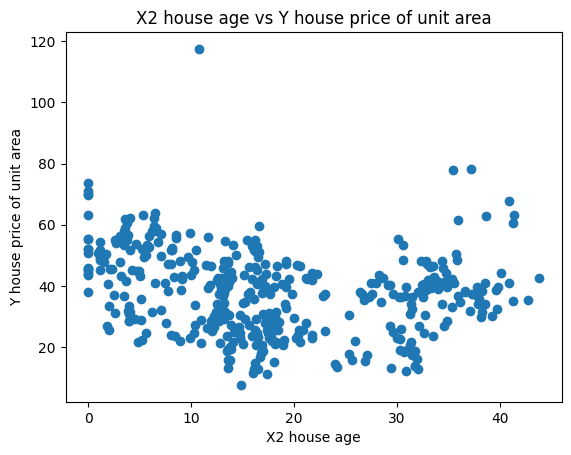

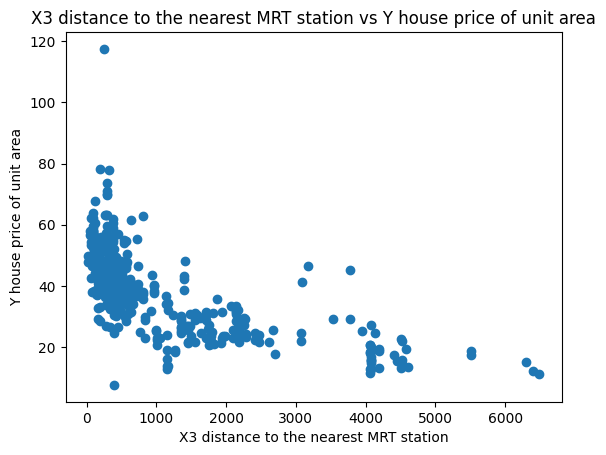

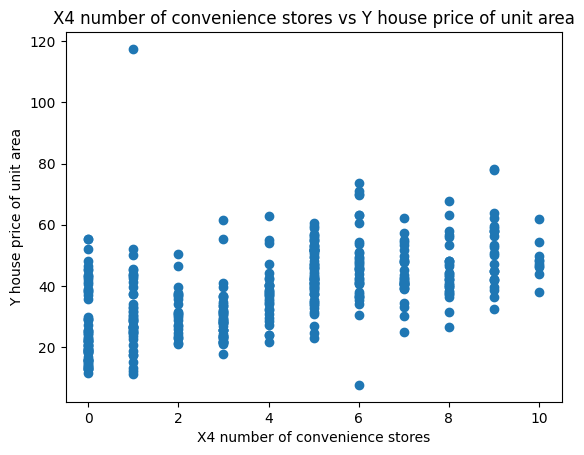

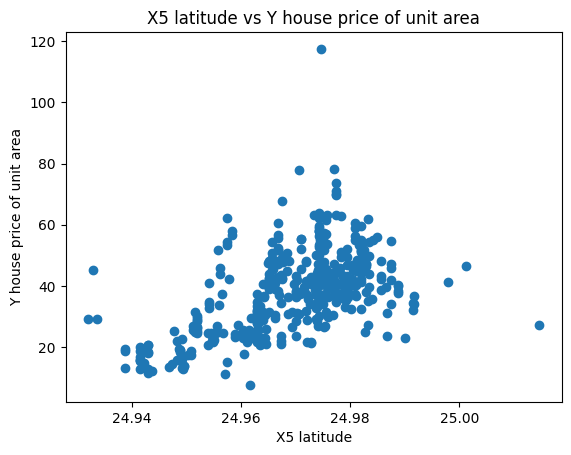

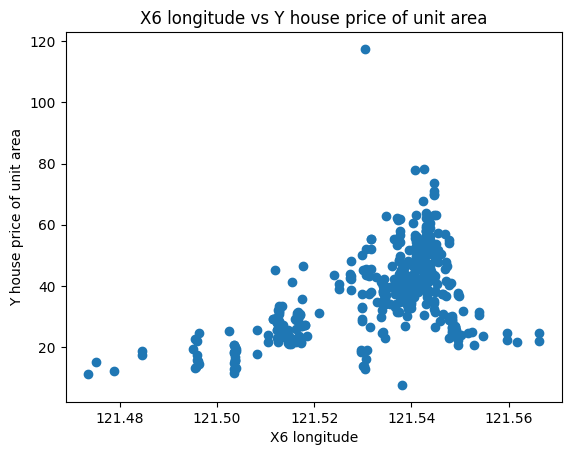

In [9]:
price_col = df.columns[-1]

for col in df.columns[1:-1]:
    plt.figure()
    plt.scatter(df[col], df[price_col])
    plt.xlabel(col)
    plt.ylabel(price_col)
    plt.title(f"{col} vs {price_col}")
    plt.show()

In [10]:
df = df.drop(df.columns[0], axis=1)

In [11]:
X = df.iloc[:, :-1].values
y = df.iloc[:, -1].values

In [12]:
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.25, random_state=42
)

In [13]:
scaler = MinMaxScaler()

X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

In [14]:
class LinearRegression:
    def __init__(self):
        self.theta = None

    def fit(self, X, y):
        X = np.c_[np.ones(X.shape[0]), X]
        self.theta = np.linalg.inv(X.T @ X) @ X.T @ y

    def predict(self, X):
        X = np.c_[np.ones(X.shape[0]), X]
        return X @ self.theta

In [15]:
my_model = LinearRegression()
my_model.fit(X_train, y_train)

y_pred_custom = my_model.predict(X_test)

In [16]:
mse_custom = mean_squared_error(y_test, y_pred_custom)
r2_custom = r2_score(y_test, y_pred_custom)

print("Custom Model MSE:", mse_custom)
print("Custom Model R2:", r2_custom)

Custom Model MSE: 66.67336271835994
Custom Model R2: 0.5796624182861749


In [17]:
sk_model = SklearnLR()
sk_model.fit(X_train, y_train)

y_pred_sk = sk_model.predict(X_test)

In [18]:
mse_sk = mean_squared_error(y_test, y_pred_sk)
r2_sk = r2_score(y_test, y_pred_sk)

print("Sklearn Model MSE:", mse_sk)
print("Sklearn Model R2:", r2_sk)

Sklearn Model MSE: 66.67336271835958
Sklearn Model R2: 0.5796624182861772


In [19]:
class LinearRegressionGD:
    def __init__(self, lr=0.01, epochs=1000):
        self.lr = lr
        self.epochs = epochs

    def fit(self, X, y):
        X = np.c_[np.ones(X.shape[0]), X]
        self.theta = np.zeros(X.shape[1])

        for _ in range(self.epochs):
            y_pred = X @ self.theta
            error = y_pred - y
            self.theta -= self.lr * (X.T @ error) / len(y)

    def predict(self, X):
        X = np.c_[np.ones(X.shape[0]), X]
        return X @ self.theta

In [20]:
gd_model = LinearRegressionGD(lr=0.05, epochs=3000)
gd_model.fit(X_train, y_train)

y_pred_gd = gd_model.predict(X_test)

print("GD MSE:", mean_squared_error(y_test, y_pred_gd))
print("GD R2:", r2_score(y_test, y_pred_gd))

GD MSE: 65.06951236519492
GD R2: 0.5897737813762294


In [21]:
results = pd.DataFrame({
    "Model": ["Custom (Normal Eq)", "Gradient Descent", "Sklearn"],
    "MSE": [mse_custom, mean_squared_error(y_test, y_pred_gd), mse_sk],
    "R2": [r2_custom, r2_score(y_test, y_pred_gd), r2_sk]
})

results

,Model,MSE,R2
0,Custom (Normal Eq),66.673363,0.579662
1,Gradient Descent,65.069512,0.589774
2,Sklearn,66.673363,0.579662


# Logistic Regression
## Question 3

The breast cancer dataset is a binary classification dataset commonly used in machine learning tasks. It is available in scikit-learn (sklearn) as part of its datasets module.
Here is an explanation of the breast cancer dataset's components:

* Features (X):

 * The breast cancer dataset consists of 30 numeric features representing different characteristics of the FNA images. These features include mean, standard error, and worst (largest) values of various attributes such as radius, texture, smoothness, compactness, concavity, symmetry, fractal dimension, etc.

* Target (y):

 * The breast cancer dataset is a binary classification problem, and the target variable (y) represents the diagnosis of the breast mass. It contains two classes:
    * 0: Represents a malignant (cancerous) tumor.
    * 1: Represents a benign (non-cancerous) tumor.

Complete the code given below in place of the "..."

1. Load the dataset from sklearn.datasets
2. Separate out the X and Y columns.
3. Normalize the X data using MinMaxScaler or StandardScaler.
4. Create a train-test-split. Take any suitable test size.

In [22]:
import numpy as np
import pandas as pd

from sklearn.datasets import load_breast_cancer
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

In [23]:
data = load_breast_cancer()

In [24]:
X = data.data      # shape: (n_samples, 30)
y = data.target    # 0 = malignant, 1 = benign

In [25]:
scaler = StandardScaler()
X = scaler.fit_transform(X)

In [26]:
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42
)

In [27]:
print(X_train.shape, X_test.shape)
print(y_train.shape, y_test.shape)

(455, 30) (114, 30)
(455,) (114,)


5. Write code for the sigmoid function and Logistic regression.


In [31]:
def sigmoid(z):
    return 1 / (1 + np.exp(-z))

def sigmoid_derivative(z):
    s = sigmoid(z)
    return s * (1 - s)

class LogisticRegression:
    def __init__(self, learning_rate, epochs):
      #Initialise the hyperparameters of the model
        self.lr = learning_rate
        self.epochs = epochs

    def fit(self, X, y):
        n_samples, n_features = X.shape
        y = y.reshape(-1, 1)
        self.weights = np.zeros((n_features, 1))
        self.bias = 0

        #Implement the GD algortihm
        for _ in range(self.epochs):
            z = np.dot(X, self.weights) + self.bias
            y_pred = sigmoid(z)

            dw = (1 / n_samples) * np.dot(X.T, (y_pred - y))
            db = (1 / n_samples) * np.sum(y_pred - y)

            self.weights -= self.lr * dw
            self.bias -= self.lr * db

    def predict(self, X):
      #Write the predict function
        z = np.dot(X, self.weights) + self.bias
        y_pred = sigmoid(z)
        y_pred = (y_pred >= 0.5).astype(int)
        return y_pred

6. Fit your model on the dataset and make predictions.
7. Compare your model with the Sklearn Logistic Regression model. Try out all the different penalties.
8. Print accuracy_score in each case using sklearn.metrics .

In [32]:
import numpy as np

from sklearn.datasets import load_breast_cancer
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score
from sklearn.linear_model import LogisticRegression as SkLogisticRegression

In [33]:
data = load_breast_cancer()

X = data.data
y = data.target

scaler = StandardScaler()
X = scaler.fit_transform(X)

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42
)

In [34]:
my_model = LogisticRegression(learning_rate=0.01, epochs=3000)
my_model.fit(X_train, y_train)

y_pred_custom = my_model.predict(X_test)

acc_custom = accuracy_score(y_test, y_pred_custom)

print("Custom Logistic Regression Accuracy:", acc_custom)

Custom Logistic Regression Accuracy: 0.9824561403508771


In [35]:
sk_none = SkLogisticRegression(penalty=None, max_iter=5000)
sk_none.fit(X_train, y_train)

y_pred_none = sk_none.predict(X_test)
print("Sklearn (No penalty) Accuracy:", accuracy_score(y_test, y_pred_none))

Sklearn (No penalty) Accuracy: 0.9385964912280702


In [36]:
sk_l2 = SkLogisticRegression(penalty='l2', max_iter=5000)
sk_l2.fit(X_train, y_train)

y_pred_l2 = sk_l2.predict(X_test)
print("Sklearn (L2 penalty) Accuracy:", accuracy_score(y_test, y_pred_l2))

Sklearn (L2 penalty) Accuracy: 0.9736842105263158


In [37]:
sk_l1 = SkLogisticRegression(penalty='l1', solver='liblinear', max_iter=5000)
sk_l1.fit(X_train, y_train)

y_pred_l1 = sk_l1.predict(X_test)
print("Sklearn (L1 penalty) Accuracy:", accuracy_score(y_test, y_pred_l1))

Sklearn (L1 penalty) Accuracy: 0.9736842105263158


In [38]:
sk_en = SkLogisticRegression(
    penalty='elasticnet',
    solver='saga',
    l1_ratio=0.5,
    max_iter=5000
)
sk_en.fit(X_train, y_train)

y_pred_en = sk_en.predict(X_test)
print("Sklearn (ElasticNet) Accuracy:", accuracy_score(y_test, y_pred_en))


Sklearn (ElasticNet) Accuracy: 0.9736842105263158


The custom Logistic Regression achieves accuracy close to the sklearn implementation.
Regularization (L1, L2, ElasticNet) slightly improves generalization by controlling overfitting.

9. For the best model in each case (yours and scikit-learn), print the classification_report using sklearn.metrics .
10. For the best model in each case (yours and scikit-learn), print the confusion_matrix using sklearn.metrics .

In [39]:
from sklearn.metrics import classification_report, confusion_matrix

In [40]:
print("=== Custom Logistic Regression ===\n")

print("Classification Report:")
print(classification_report(y_test, y_pred_custom))

print("Confusion Matrix:")
print(confusion_matrix(y_test, y_pred_custom))

=== Custom Logistic Regression ===

Classification Report:
              precision    recall  f1-score   support

           0       0.98      0.98      0.98        43
           1       0.99      0.99      0.99        71

    accuracy                           0.98       114
   macro avg       0.98      0.98      0.98       114
weighted avg       0.98      0.98      0.98       114

Confusion Matrix:
[[42  1]
 [ 1 70]]


In [41]:
print("\n=== Sklearn Logistic Regression (L2) ===\n")

print("Classification Report:")
print(classification_report(y_test, y_pred_l2))

print("Confusion Matrix:")
print(confusion_matrix(y_test, y_pred_l2))


=== Sklearn Logistic Regression (L2) ===

Classification Report:
              precision    recall  f1-score   support

           0       0.98      0.95      0.96        43
           1       0.97      0.99      0.98        71

    accuracy                           0.97       114
   macro avg       0.97      0.97      0.97       114
weighted avg       0.97      0.97      0.97       114

Confusion Matrix:
[[41  2]
 [ 1 70]]


# KNN
## Question 4

How accurately can a K-Nearest Neighbors (KNN) model classify different types of glass based on a glass classification dataset consisting of 214 samples and 7 classes? Use the kaggle dataset "https://www.kaggle.com/datasets/uciml/glass".

Context: This is a Glass Identification Data Set from UCI. It contains 10 attributes including id. The response is glass type(discrete 7 values)

1. Load the data as you did in the 2nd question.
2. Extract the X and Y columns.
3. Split it into training and testing datasets.

In [42]:
import numpy as np
import pandas as pd

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

In [43]:
df = pd.read_csv("glass.csv")
df.head()

,RI,Na,Mg,Al,Si,K,Ca,Ba,Fe,Type
0,1.52101,13.64,4.49,1.10,71.78,0.06,8.75,0.0,0.0,1
1,1.51761,13.89,3.60,1.36,72.73,0.48,7.83,0.0,0.0,1
2,1.51618,13.53,3.55,1.54,72.99,0.39,7.78,0.0,0.0,1
3,1.51766,13.21,3.69,1.29,72.61,0.57,8.22,0.0,0.0,1
4,1.51742,13.27,3.62,1.24,73.08,0.55,8.07,0.0,0.0,1


In [44]:
df.info()
df.isnull().sum()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 214 entries, 0 to 213
Data columns (total 10 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   RI      214 non-null    float64
 1   Na      214 non-null    float64
 2   Mg      214 non-null    float64
 3   Al      214 non-null    float64
 4   Si      214 non-null    float64
 5   K       214 non-null    float64
 6   Ca      214 non-null    float64
 7   Ba      214 non-null    float64
 8   Fe      214 non-null    float64
 9   Type    214 non-null    int64  
dtypes: float64(9), int64(1)
memory usage: 16.8 KB


,0
RI,0
Na,0
Mg,0
Al,0
Si,0
K,0
Ca,0
Ba,0
Fe,0
Type,0


In [45]:
X = df.iloc[:, 1:-1].values   # features
y = df.iloc[:, -1].values    # glass type (1–7)

In [46]:
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.25, random_state=42, stratify=y
)

In [47]:
scaler = StandardScaler()

X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

In [48]:
knn = KNeighborsClassifier(n_neighbors=5, metric='euclidean')
knn.fit(X_train, y_train)

KNeighborsClassifier(metric='euclidean')

In [49]:
y_pred = knn.predict(X_test)

acc = accuracy_score(y_test, y_pred)
print("KNN Accuracy:", acc)

KNN Accuracy: 0.6851851851851852


In [50]:
print("Classification Report:")
print(classification_report(y_test, y_pred))

print("Confusion Matrix:")
print(confusion_matrix(y_test, y_pred))

Classification Report:
              precision    recall  f1-score   support

           1       0.67      0.78      0.72        18
           2       0.67      0.74      0.70        19
           3       0.00      0.00      0.00         4
           5       0.50      0.33      0.40         3
           6       1.00      0.50      0.67         2
           7       0.78      0.88      0.82         8

    accuracy                           0.69        54
   macro avg       0.60      0.54      0.55        54
weighted avg       0.64      0.69      0.65        54

Confusion Matrix:
[[14  4  0  0  0  0]
 [ 4 14  0  1  0  0]
 [ 3  1  0  0  0  0]
 [ 0  1  0  1  0  1]
 [ 0  0  0  0  1  1]
 [ 0  1  0  0  0  7]]


/usr/local/lib/python3.12/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.12/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.12/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


In [51]:
for k in range(1, 16):
    knn = KNeighborsClassifier(n_neighbors=k)
    knn.fit(X_train, y_train)
    y_pred = knn.predict(X_test)
    print(f"k = {k}, Accuracy = {accuracy_score(y_test, y_pred):.3f}")

k = 1, Accuracy = 0.704
k = 2, Accuracy = 0.685
k = 3, Accuracy = 0.759
k = 4, Accuracy = 0.704
k = 5, Accuracy = 0.685
k = 6, Accuracy = 0.685
k = 7, Accuracy = 0.722
k = 8, Accuracy = 0.722
k = 9, Accuracy = 0.759
k = 10, Accuracy = 0.741
k = 11, Accuracy = 0.722
k = 12, Accuracy = 0.704
k = 13, Accuracy = 0.741
k = 14, Accuracy = 0.667
k = 15, Accuracy = 0.685


4. Define Euclidean distance.
5. Build the KNN model.
6. Fit the model on the training data. (Note : you may require to change the type of the data from pandas dataframe to numpy arrays. To do that, just do this X=np.array(X) and so on...)

In [52]:
import numpy as np

def euclidean_distance(x1, x2):
    return np.sqrt(np.sum((x1 - x2) ** 2))

In [53]:
class KNN:
    def __init__(self, k=5):
        self.k = k

    def fit(self, X, y):
        # Ensure numpy arrays
        self.X_train = np.array(X)
        self.y_train = np.array(y)

    def predict(self, X):
        X = np.array(X)
        predictions = []

        for x in X:
            # Compute distances to all training points
            distances = [euclidean_distance(x, x_train) for x_train in self.X_train]

            # Get indices of k nearest neighbors
            k_indices = np.argsort(distances)[:self.k]

            # Get labels of k nearest neighbors
            k_labels = self.y_train[k_indices]

            # Majority vote
            most_common = np.bincount(k_labels).argmax()
            predictions.append(most_common)

        return np.array(predictions)

In [54]:
# Convert to numpy arrays explicitly (as mentioned in the note)
X_train = np.array(X_train)
y_train = np.array(y_train)
X_test = np.array(X_test)

In [55]:
knn = KNN(k=5)
knn.fit(X_train, y_train)

In [56]:
y_pred = knn.predict(X_test)

7. Make predictions. Find their accuracy using accuracy_score. Try different k values. k=3 worked well in our case.
8. Compare with the sklearn model (from sklearn.neighbors import KNeighborsClassifier)

In [57]:
from sklearn.metrics import accuracy_score
from sklearn.neighbors import KNeighborsClassifier

In [58]:
# k = 3 (given that it works well)
knn_custom = KNN(k=3)
knn_custom.fit(X_train, y_train)

y_pred_custom = knn_custom.predict(X_test)

acc_custom = accuracy_score(y_test, y_pred_custom)
print("Custom KNN Accuracy (k=3):", acc_custom)

Custom KNN Accuracy (k=3): 0.7592592592592593


In [59]:
print("Custom KNN Accuracies:")
for k in [1, 3, 5, 7, 9]:
    knn = KNN(k=k)
    knn.fit(X_train, y_train)
    y_pred = knn.predict(X_test)
    acc = accuracy_score(y_test, y_pred)
    print(f"k = {k} → Accuracy = {acc:.3f}")

Custom KNN Accuracies:
k = 1 → Accuracy = 0.704
k = 3 → Accuracy = 0.759
k = 5 → Accuracy = 0.685
k = 7 → Accuracy = 0.722
k = 9 → Accuracy = 0.759


In [60]:
knn_sklearn = KNeighborsClassifier(n_neighbors=3, metric='euclidean')
knn_sklearn.fit(X_train, y_train)

y_pred_sk = knn_sklearn.predict(X_test)

acc_sk = accuracy_score(y_test, y_pred_sk)
print("Sklearn KNN Accuracy (k=3):", acc_sk)

Sklearn KNN Accuracy (k=3): 0.7592592592592593
